In [1]:
import os
import rasterio
import geopandas as gpd
import matplotlib.pyplot as plt
from glob import glob
from pathlib import Path
from shapely.geometry import Point
from rasterio.plot import show

In [2]:
wv_data_dir = '/adapt/nobackup/people/mwooten3/Senegal_LCLUC/VHR/CAS/M1BS'
atl08_data_regex = '/explore/nobackup/projects/ilab/projects/Senegal/CNN_CHM/senegal_20m/intersection_metadata_evhrtoa/CAS/*.gpkg'

/adapt/nobackup/people/mwooten3/Senegal_LCLUC/VHR/CAS/M1BS/WV02_20190127_M1BS_103001008ABC2C00-toa.tif


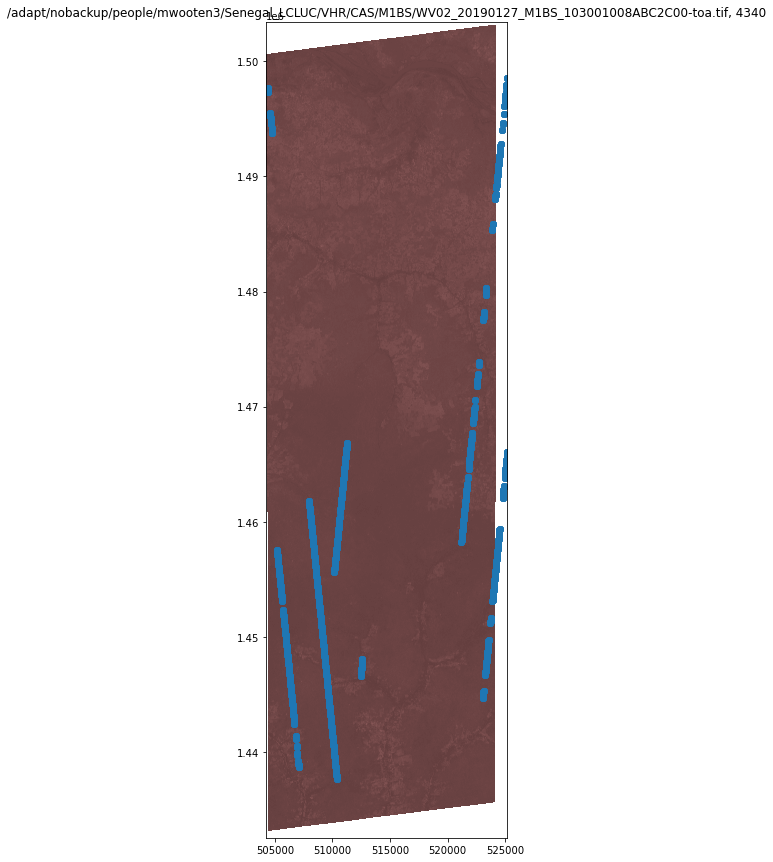

/adapt/nobackup/people/mwooten3/Senegal_LCLUC/VHR/CAS/M1BS/WV02_20200527_M1BS_10300100A5513B00-toa.tif


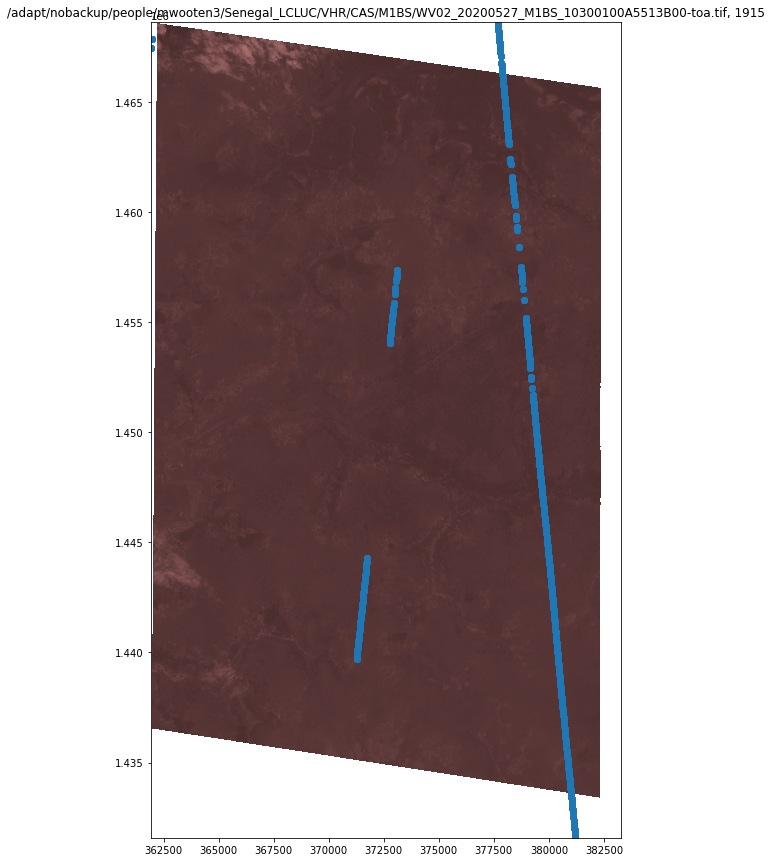

/adapt/nobackup/people/mwooten3/Senegal_LCLUC/VHR/CAS/M1BS/WV02_20181117_M1BS_103001008840D600-toa.tif


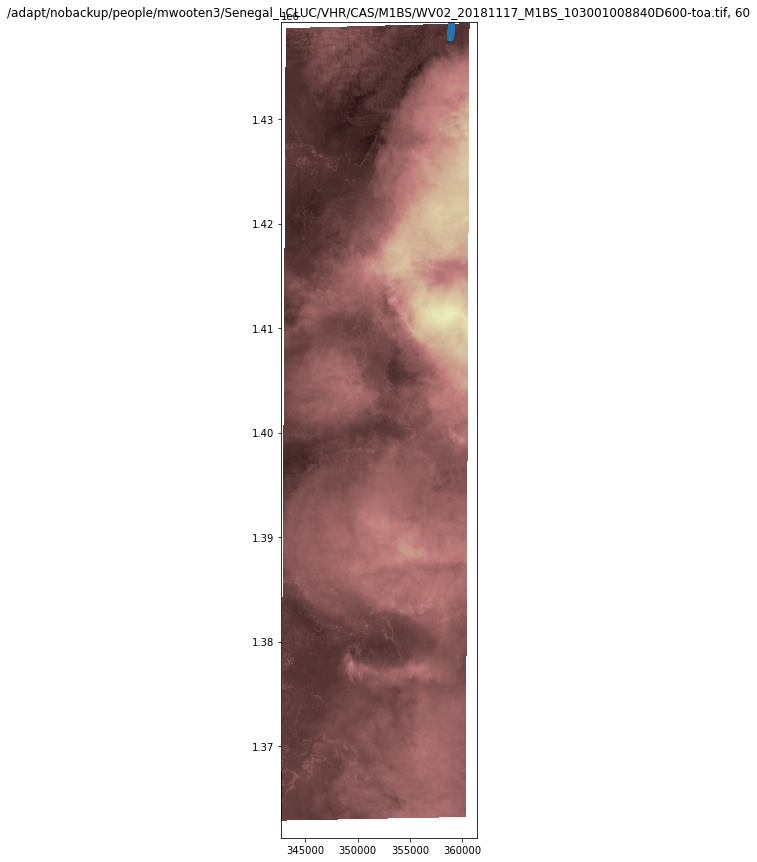

/adapt/nobackup/people/mwooten3/Senegal_LCLUC/VHR/CAS/M1BS/WV02_20210410_M1BS_10300100BC0C8900-toa.tif


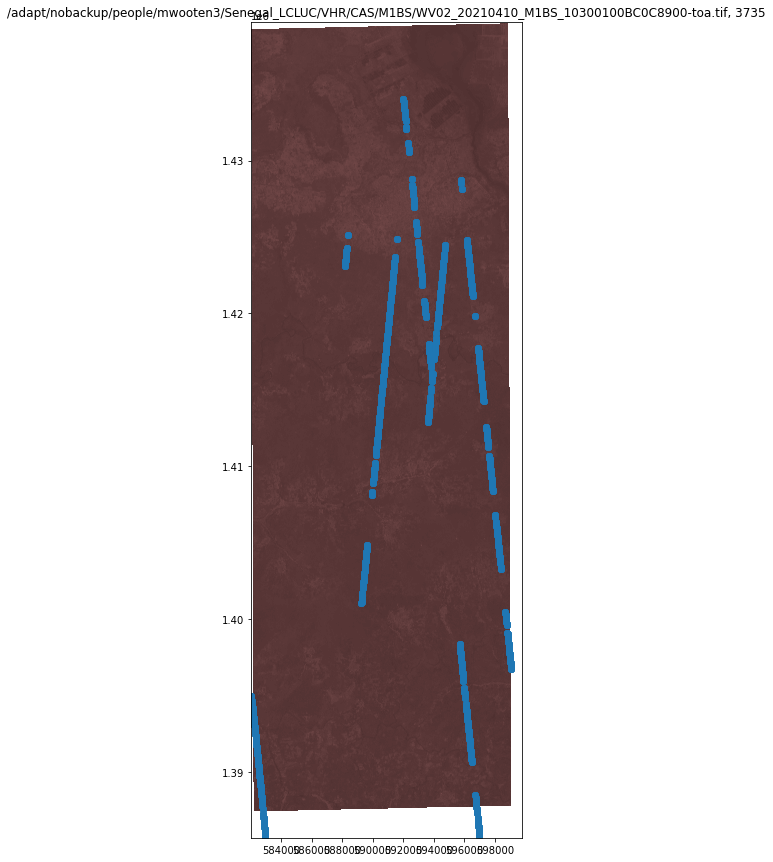

/adapt/nobackup/people/mwooten3/Senegal_LCLUC/VHR/CAS/M1BS/WV02_20200503_M1BS_10300100A88AEC00-toa.tif


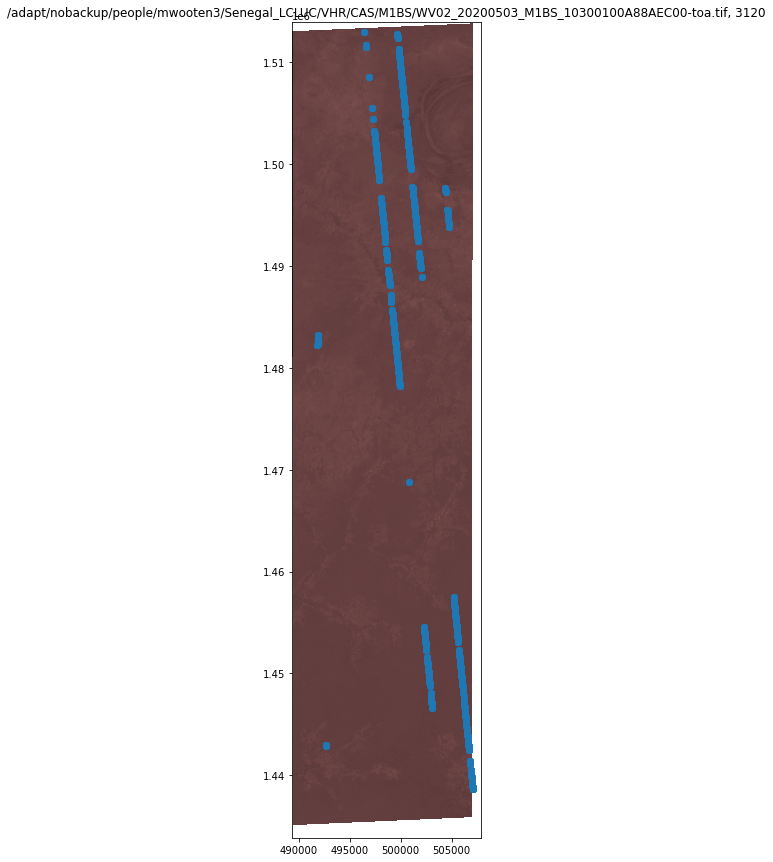

/adapt/nobackup/people/mwooten3/Senegal_LCLUC/VHR/CAS/M1BS/WV02_20210520_M1BS_10300100BE3EA100-toa.tif


KeyboardInterrupt: 

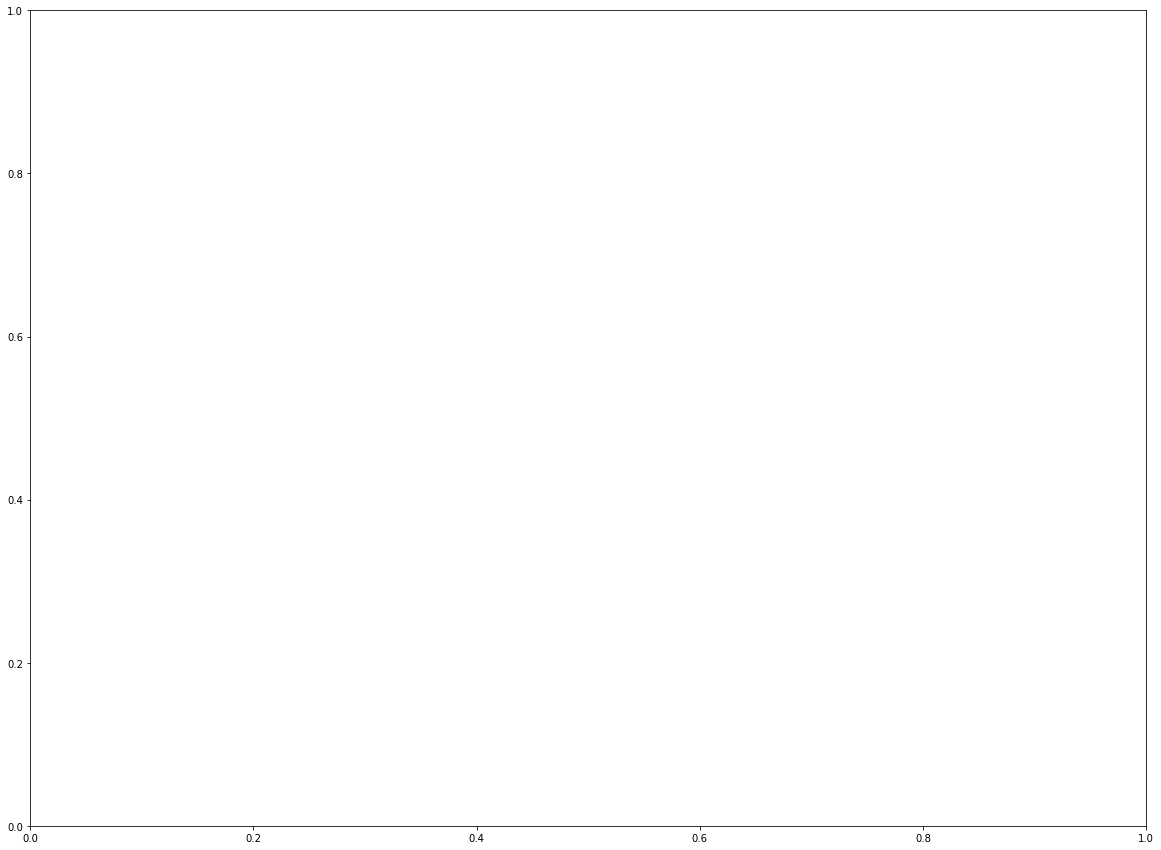

In [3]:
for atl08_filename in glob(atl08_data_regex):
    
    wv_filename = os.path.join(wv_data_dir, f'{Path(atl08_filename).stem}.tif')
    
    raster_data = rasterio.open(wv_filename)
    atl08_data = gpd.read_file(atl08_filename, layer='ATL08_WorldView')
    
    print(wv_filename)

    fig, ax = plt.subplots(figsize=(20,15))
    
    # transform rasterio plot to real world coords
    extent=[raster_data.bounds[0], raster_data.bounds[2], raster_data.bounds[1], raster_data.bounds[3]]
    ax = rasterio.plot.show(raster_data, extent=extent, ax=ax, cmap='pink')
    atl08_data.plot(ax=ax)

    plt.title(f'{wv_filename}, {atl08_data.shape[0]}')
    plt.show()